In [3]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Define paths to the directories
healthy_dir = r"C:\Users\anura\Downloads\RS DATASET\RS Practical 1\Healthy"  # Replace with the path to the healthy directory
late_blight_dir = r"C:\Users\anura\Downloads\RS DATASET\RS Practical 1\Late_Blight"  # Replace with the path to the late_blight directory

# Parameters
image_size = (64, 64)  # Image dimensions (64x64)

# Step 1: Load and preprocess images
def load_images_from_directory(directory, label):
    images = []
    labels = []
    for file in os.listdir(directory):
        if file.endswith(".jpg") or file.endswith(".png"):  # Ensure valid image files
            filepath = os.path.join(directory, file)
            img = load_img(filepath, target_size=image_size)  # Load and resize image
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load images and labels for both directories
healthy_images, healthy_labels = load_images_from_directory(healthy_dir, 0)  # Label 0 for healthy
late_blight_images, late_blight_labels = load_images_from_directory(late_blight_dir, 1)  # Label 1 for late_blight

# Combine the data
X = np.array(healthy_images + late_blight_images)
y = np.array(healthy_labels + late_blight_labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the CNN model
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the CNN model
cnn_model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=10,
    validation_split=0.2,  # Use a portion of the training set for validation
    verbose=1
)

# Step 4: Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\anura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7845 - loss: 0.5004 - val_accuracy: 0.8696 - val_loss: 0.1394
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9742 - loss: 0.1133 - val_accuracy: 1.0000 - val_loss: 0.0157
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9838 - loss: 0.0441 - val_accuracy: 0.9710 - val_loss: 0.0775
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9854 - loss: 0.0400 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9918 - loss: 0.0187 - val_accuracy: 1.0000 - val_loss: 0.0026
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0036
Test Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


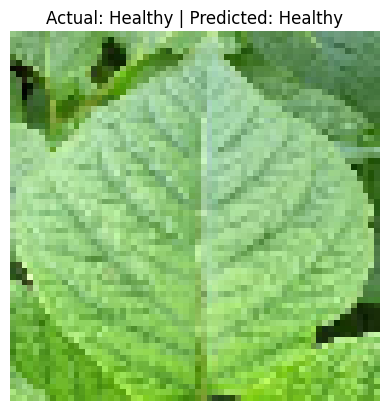

In [5]:
import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img

# Step 1: Predict on a random test sample
def predict_random_sample(X_test, y_test, model):
    # Choose a random index from the test set
    random_index = random.randint(0, len(X_test) - 1)

    # Get the random sample and its actual label
    sample_image = X_test[random_index]
    actual_label = y_test[random_index]

    # Reshape for model prediction
    sample_image_reshaped = np.expand_dims(sample_image, axis=0)  # Add batch dimension
    predicted_label = model.predict(sample_image_reshaped)[0][0]  # Predict

    # Convert prediction to binary (0 or 1 based on a threshold of 0.5)
    predicted_class = 1 if predicted_label > 0.5 else 0

    return sample_image, actual_label, predicted_class

# Step 2: Display the image with labels
def display_prediction(sample_image, actual_label, predicted_label):
    # Convert numeric labels to text
    labels_map = {0: "Healthy", 1: "Late Blight"}
    actual_text = labels_map[actual_label]
    predicted_text = labels_map[predicted_label]

    # Display the image
    plt.imshow(array_to_img(sample_image))  # Convert array to image for plotting
    plt.axis('off')  # Hide axis
    plt.title(f"Actual: {actual_text} | Predicted: {predicted_text}", fontsize=12)
    plt.show()

# Step 3: Run the prediction and visualization
sample_image, actual_label, predicted_label = predict_random_sample(X_test, y_test, cnn_model)
display_prediction(sample_image, actual_label, predicted_label)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
# Replace with the correct path to your dataset
data = pd.read_csv(r"C:\Users\anura\Downloads\RS DATASET\RS Practical 1\yield_dataset.csv")

data.dropna(inplace=True)

data.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [10]:
# Step 2: Separate features and target variable
X = data.drop('Yeild (Q/acre)', axis=1)  # Drop the target column to create feature set
y = data['Yeild (Q/acre)']  # Target variable

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue         object
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

In [11]:
# data['Temperatue'] = data['Temperatue'].str.extract(r'([-+]?\d*\.?\d+)')  # Extract numeric part
data['Temperatue'] = pd.to_numeric(data['Temperatue'], errors='coerce')  # Convert to numeric


In [13]:

# Step 4: Train the Random Forest model
yield_model = RandomForestRegressor(n_estimators=100, random_state=42)
yield_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = yield_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.51
R^2 Score: 0.89


In [14]:
# Step 3: Simple Recommendation System
def recommend(disease_prediction, yield_prediction):
    if disease_prediction >= 0.5:
      return "Disease detected! Recommended action: Apply pesticide."
    elif yield_prediction < 50:
      return "Low yield predicted! Recommended action: Improve irrigation and soil quality."
    else:
      return "Crop is healthy and yield prediction is optimal."

In [15]:
random_sample = X_test.sample(n=10, random_state=42)
# Get the corresponding true values
true_values = y_test[random_sample.index]
# Predict on the random sample
predicted_values = yield_model.predict(random_sample)
# Print the actual vs predicted values
for actual, predicted in zip(true_values, predicted_values):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual: 11.00, Predicted: 10.95
Actual: 11.00, Predicted: 10.15
Actual: 11.00, Predicted: 11.02
Actual: 11.00, Predicted: 10.30
Actual: 12.00, Predicted: 11.76
Actual: 9.00, Predicted: 10.62
Actual: 12.00, Predicted: 11.88
Actual: 11.00, Predicted: 10.08
Actual: 11.00, Predicted: 10.37
Actual: 7.00, Predicted: 7.57
